In [1]:
!pip install sympy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('swimming_doping.csv', encoding = 'cp949')

In [5]:
data.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date
0,Sun Yang,CHN,1991.12.01,Male,198,1,Men 400m Freestyle,Freestyle,03:45.0,935,-,28,FINA Champions Swim Series 2020,CHN,19-01-2020
1,Sun Yang,CHN,1991.12.02,Male,198,1,Men 200m Freestyle,Freestyle,01:45.6,902,-,28,FINA Champions Swim Series 2020,CHN,18-01-2020
2,Sun Yang,CHN,1991.12.03,Male,198,1,Men 400m Freestyle,Freestyle,03:44.1,947,-,28,FINA Champions Swim Series 2020,CHN,15-01-2020


In [6]:
Sun_Yang = data.iloc[0:121,:]
Sun_Yang.tail(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date
118,Sun Yang,CHN,1991.12.121,Male,198,28,Men 400m Freestyle,Freestyle,03:50.9,896,H,16,Olympic Games Beijing 2008,CHN,09-08-2008
119,Sun Yang,CHN,1991.12.122,Male,198,22,Men 800m Freestyle,Freestyle,08:08.1,-,H,15,12th FINA World Championships 2007,AUS,27-03-2007
120,Sun Yang,CHN,1991.12.123,Male,198,31,Men 400m Freestyle,Freestyle,03:56.1,-,H,15,12th FINA World Championships 2007,AUS,25-03-2007


In [7]:
Peru = data.iloc[121:,:]
Peru.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date
121,Mauricio Fiol Villanueva,PER,1994.03.27,Male,178,16 (2),Men 100m Butterfly,Butterfly,52.25,-,-,21,17th Pan American Games 2015,CAN,16-07-2015
122,Mauricio Fiol Villanueva,PER,1994.03.28,Male,178,16 (1),Men 200m Butterfly,Butterfly,01:56.8,-,-,21,17th Pan American Games 2015,CAN,14-07-2015
123,Mauricio Fiol Villanueva,PER,1994.03.29,Male,178,1,Mixed 4x50m Freestyle Relay,Relay,01:42.0,-,-,-,Peruvian National Championships (50m),PER,25-06-2015


# 쑨양

In [8]:
Sun_Yang['Event'].value_counts()

Men 400m Freestyle            32
Men 200m Freestyle            28
Men 1500m Freestyle           22
Men 800m Freestyle            15
Men 4x200m Freestyle Relay    13
Men 4x100m Freestyle Relay     4
Men 100m Freestyle             3
Men 4x100m Medley Relay        1
Men 200m Medley                1
Men 400m Medley                1
Men 800 Freestyle              1
Name: Event, dtype: int64

In [9]:
Sun_yang_400m = Sun_Yang[Sun_Yang['Event']== 'Men 400m Freestyle']
Sun_yang_400m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date
0,Sun Yang,CHN,1991.12.01,Male,198,1,Men 400m Freestyle,Freestyle,03:45.0,935,-,28,FINA Champions Swim Series 2020,CHN,19-01-2020
2,Sun Yang,CHN,1991.12.03,Male,198,1,Men 400m Freestyle,Freestyle,03:44.1,947,-,28,FINA Champions Swim Series 2020,CHN,15-01-2020
8,Sun Yang,CHN,1991.12.09,Male,198,1,Men 400m Freestyle,Freestyle,03:42.4,968,-,27,18th FINA World Championships 2019,KOR,21-07-2019


In [10]:
Sun_yang_400m['min'] = Sun_yang_400m['Time'].str.split(':').str[0]
Sun_yang_400m['sec'] = Sun_yang_400m['Time'].str.split(':').str[1]
Sun_yang_400m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec
0,Sun Yang,CHN,1991.12.01,Male,198,1,Men 400m Freestyle,Freestyle,03:45.0,935,-,28,FINA Champions Swim Series 2020,CHN,19-01-2020,03,45.0
2,Sun Yang,CHN,1991.12.03,Male,198,1,Men 400m Freestyle,Freestyle,03:44.1,947,-,28,FINA Champions Swim Series 2020,CHN,15-01-2020,03,44.1
8,Sun Yang,CHN,1991.12.09,Male,198,1,Men 400m Freestyle,Freestyle,03:42.4,968,-,27,18th FINA World Championships 2019,KOR,21-07-2019,03,42.4


In [11]:
Sun_yang_400m['min'] = Sun_yang_400m['min'].astype(float)
Sun_yang_400m['sec'] = Sun_yang_400m['sec'].astype(float)

In [12]:
Sun_yang_400m['time'] = Sun_yang_400m['min']*60 + Sun_yang_400m['sec']

In [13]:
Sun_yang_400m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec,time
0,Sun Yang,CHN,1991.12.01,Male,198,1,Men 400m Freestyle,Freestyle,03:45.0,935,-,28,FINA Champions Swim Series 2020,CHN,19-01-2020,3.0,45.0,225.0
2,Sun Yang,CHN,1991.12.03,Male,198,1,Men 400m Freestyle,Freestyle,03:44.1,947,-,28,FINA Champions Swim Series 2020,CHN,15-01-2020,3.0,44.1,224.1
8,Sun Yang,CHN,1991.12.09,Male,198,1,Men 400m Freestyle,Freestyle,03:42.4,968,-,27,18th FINA World Championships 2019,KOR,21-07-2019,3.0,42.4,222.4


In [14]:
s_400_time = Sun_yang_400m[['time']]

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(s_400_time)
time_scaled = scaler.transform(s_400_time)

In [16]:
Sun_yang_400m['time_scaled'] = time_scaled

In [17]:
Sun_yang_400m.head()

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec,time,time_scaled
0,Sun Yang,CHN,1991.12.01,Male,198,1,Men 400m Freestyle,Freestyle,03:45.0,935,-,28,FINA Champions Swim Series 2020,CHN,19-01-2020,3.0,45.0,225.0,0.400809
2,Sun Yang,CHN,1991.12.03,Male,198,1,Men 400m Freestyle,Freestyle,03:44.1,947,-,28,FINA Champions Swim Series 2020,CHN,15-01-2020,3.0,44.1,224.1,0.134834
8,Sun Yang,CHN,1991.12.09,Male,198,1,Men 400m Freestyle,Freestyle,03:42.4,968,-,27,18th FINA World Championships 2019,KOR,21-07-2019,3.0,42.4,222.4,-0.367562
9,Sun Yang,CHN,1991.12.10,Male,198,1,Men 400m Freestyle,Freestyle,03:42.8,964,-,27,FINA Champions Swim Series 2019,CHN,28-04-2019,3.0,42.8,222.8,-0.249351
14,Sun Yang,CHN,1991.12.15,Male,198,1,Men 400m Freestyle,Freestyle,03:43.7,951,-,27,National Swimming Championships 2019 (50m),CHN,24-03-2019,3.0,43.7,223.7,0.016623


<AxesSubplot:xlabel='time_scaled', ylabel='Count'>

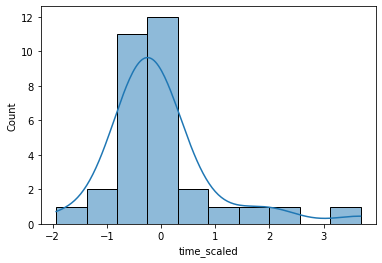

In [18]:
sns.histplot(Sun_yang_400m['time_scaled'] ,kde = True , bins =10)

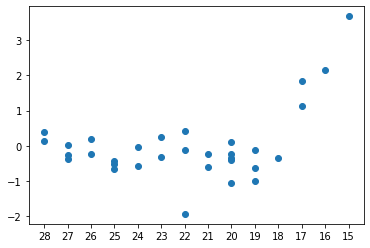

In [19]:
plt.scatter(x=Sun_yang_400m['Age'] , y =Sun_yang_400m['time_scaled'])

In [20]:
#쑨양 200m 자유형
Sun_yang_200m = Sun_Yang[Sun_Yang['Event']== 'Men 200m Freestyle']

Sun_yang_200m['min'] = Sun_yang_200m['Time'].str.split(':').str[0]
Sun_yang_200m['sec'] = Sun_yang_200m['Time'].str.split(':').str[1]

Sun_yang_200m['min'] = Sun_yang_200m['min'].astype(float)
Sun_yang_200m['sec'] = Sun_yang_200m['sec'].astype(float)

Sun_yang_200m['time'] = Sun_yang_200m['min']*60 + Sun_yang_200m['sec']

s_200_time = Sun_yang_200m[['time']]

scaler.fit(s_200_time)
time_200_scaled = scaler.transform(s_200_time)

Sun_yang_200m['time_scaled'] = time_200_scaled

In [21]:
Sun_yang_200m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec,time,time_scaled
1,Sun Yang,CHN,1991.12.02,Male,198,1,Men 200m Freestyle,Freestyle,01:45.6,902,-,28,FINA Champions Swim Series 2020,CHN,18-01-2020,1.0,45.6,105.6,0.098184
3,Sun Yang,CHN,1991.12.04,Male,198,2,Men 200m Freestyle,Freestyle,01:46.5,877,-,28,FINA Champions Swim Series 2020,CHN,14-01-2020,1.0,46.5,106.5,1.553616
7,Sun Yang,CHN,1991.12.08,Male,198,1,Men 200m Freestyle,Freestyle,01:44.9,918,-,27,18th FINA World Championships 2019,KOR,23-07-2019,1.0,44.9,104.9,-1.033819


<AxesSubplot:xlabel='time_scaled', ylabel='Count'>

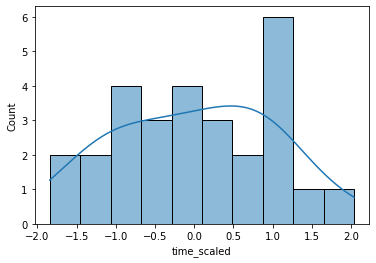

In [22]:
sns.histplot(Sun_yang_200m['time_scaled'] ,kde = True , bins = 10)

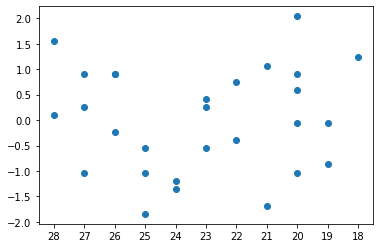

In [23]:
plt.scatter(x=Sun_yang_200m['Age'] , y =Sun_yang_200m['time_scaled'])

In [24]:
#쑨양 1500m 자유형
Sun_yang_1500m = Sun_Yang[Sun_Yang['Event']== 'Men 1500m Freestyle']

Sun_yang_1500m['min'] = Sun_yang_1500m['Time'].str.split(':').str[0]
Sun_yang_1500m['sec'] = Sun_yang_1500m['Time'].str.split(':').str[1]

Sun_yang_1500m['min'] = Sun_yang_1500m['min'].astype(float)
Sun_yang_1500m['sec'] = Sun_yang_1500m['sec'].astype(float)

Sun_yang_1500m['time'] = Sun_yang_1500m['min']*60 + Sun_yang_1500m['sec']

s_1500_time = Sun_yang_1500m[['time']]

scaler.fit(s_1500_time)
time_1500_scaled = scaler.transform(s_1500_time)

Sun_yang_1500m['time_scaled'] = time_1500_scaled

Sun_yang_1500m.head()

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec,time,time_scaled
11,Sun Yang,CHN,1991.12.12,Male,198,1,Men 1500m Freestyle,Freestyle,14:55.0,921,-,27,National Swimming Championships 2019 (50m),CHN,31-03-2019,14.0,55.0,895.0,0.362523
17,Sun Yang,CHN,1991.12.18,Male,198,1,Men 1500m Freestyle,Freestyle,14:58.5,910,-,26,18th Asian Games 2018,INA,24-08-2018,14.0,58.5,898.5,0.692478
29,Sun Yang,CHN,1991.12.30,Male,198,1,Men 1500m Freestyle,Freestyle,15:04.9,891,-,26,Chinese National Championships (50m),CHN,13-04-2018,15.0,4.9,904.9,1.295825
32,Sun Yang,CHN,1991.12.33,Male,198,1,Men 1500m Freestyle,Freestyle,15:05.2,891,-,25,2017 National Games,CHN,01-09-2017,15.0,5.2,905.2,1.324107
42,Sun Yang,CHN,1991.12.44,Male,198,1,Men 1500m Freestyle,Freestyle,15:04.1,894,-,25,National Chinese Championships (50m),CHN,08-04-2017,15.0,4.1,904.1,1.220407


<AxesSubplot:xlabel='time_scaled', ylabel='Count'>

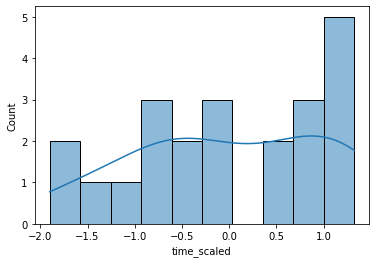

In [25]:
sns.histplot(Sun_yang_1500m['time_scaled'] ,kde = True , bins = 10)

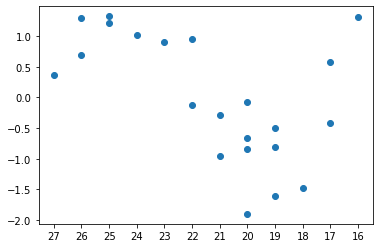

In [26]:
plt.scatter(x=Sun_yang_1500m['Age'] , y =Sun_yang_1500m['time_scaled'])

In [27]:
#쑨양 800m 자유형
Sun_yang_800m = Sun_Yang[Sun_Yang['Event']== 'Men 800m Freestyle']

Sun_yang_800m['min'] = Sun_yang_800m['Time'].str.split(':').str[0]
Sun_yang_800m['sec'] = Sun_yang_800m['Time'].str.split(':').str[1]

Sun_yang_800m['min'] = Sun_yang_800m['min'].astype(float)
Sun_yang_800m['sec'] = Sun_yang_800m['sec'].astype(float)

Sun_yang_800m['time'] = Sun_yang_800m['min']*60 + Sun_yang_800m['sec']

s_800_time = Sun_yang_800m[['time']]

scaler.fit(s_800_time)
time_800_scaled = scaler.transform(s_800_time)

Sun_yang_800m['time_scaled'] = time_800_scaled

Sun_yang_800m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec,time,time_scaled
6,Sun Yang,CHN,1991.12.07,Male,198,6,Men 800m Freestyle,Freestyle,07:45.0,919,-,27,18th FINA World Championships 2019,KOR,24-07-2019,7.0,45.0,465.0,-0.343405
12,Sun Yang,CHN,1991.12.13,Male,198,1,Men 800m Freestyle,Freestyle,07:48.0,901,-,27,National Swimming Championships 2019 (50m),CHN,27-03-2019,7.0,48.0,468.0,0.119266
21,Sun Yang,CHN,1991.12.22,Male,198,1,Men 800m Freestyle,Freestyle,07:48.4,899,-,26,18th Asian Games 2018,INA,20-08-2018,7.0,48.4,468.4,0.180956


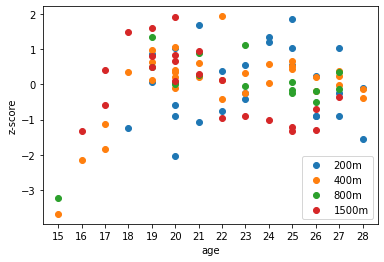

In [28]:
plt.scatter(x=Sun_yang_200m['Age'] , y =Sun_yang_200m['time_scaled']*-1,label = '200m')
plt.scatter(x=Sun_yang_400m['Age'] , y =Sun_yang_400m['time_scaled']*-1, label = '400m')
plt.scatter(x=Sun_yang_800m['Age'] , y =Sun_yang_800m['time_scaled']*-1, label = '800m')
plt.scatter(x=Sun_yang_1500m['Age'] , y =Sun_yang_1500m['time_scaled']*-1, label = '1500m')

plt.gca().invert_xaxis()
plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()

In [29]:
Sun_yang_freestlye = pd.concat([Sun_yang_200m, Sun_yang_400m,Sun_yang_800m, Sun_yang_1500m])
Sun_yang_freestlye.head()

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec,time,time_scaled
1,Sun Yang,CHN,1991.12.02,Male,198,1,Men 200m Freestyle,Freestyle,01:45.6,902,-,28,FINA Champions Swim Series 2020,CHN,18-01-2020,1.0,45.6,105.6,0.098184
3,Sun Yang,CHN,1991.12.04,Male,198,2,Men 200m Freestyle,Freestyle,01:46.5,877,-,28,FINA Champions Swim Series 2020,CHN,14-01-2020,1.0,46.5,106.5,1.553616
7,Sun Yang,CHN,1991.12.08,Male,198,1,Men 200m Freestyle,Freestyle,01:44.9,918,-,27,18th FINA World Championships 2019,KOR,23-07-2019,1.0,44.9,104.9,-1.033819
10,Sun Yang,CHN,1991.12.11,Male,198,1,Men 200m Freestyle,Freestyle,01:46.1,887,-,27,FINA Champions Swim Series 2019,CHN,28-04-2019,1.0,46.1,106.1,0.906757
13,Sun Yang,CHN,1991.12.14,Male,198,1,Men 200m Freestyle,Freestyle,01:45.7,897,-,27,National Swimming Championships 2019 (50m),CHN,26-03-2019,1.0,45.7,105.7,0.259899


In [30]:
Sun_yang_freestlye = Sun_yang_freestlye.sort_values(by = 'Age' , ascending = True)
Sun_yang_freestlye.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec,time,time_scaled
120,Sun Yang,CHN,1991.12.123,Male,198,31,Men 400m Freestyle,Freestyle,03:56.1,-,H,15,12th FINA World Championships 2007,AUS,25-03-2007,3.0,56.1,236.1,3.681165
119,Sun Yang,CHN,1991.12.122,Male,198,22,Men 800m Freestyle,Freestyle,08:08.1,-,H,15,12th FINA World Championships 2007,AUS,27-03-2007,8.0,8.1,488.1,3.219167
118,Sun Yang,CHN,1991.12.121,Male,198,28,Men 400m Freestyle,Freestyle,03:50.9,896,H,16,Olympic Games Beijing 2008,CHN,09-08-2008,3.0,50.9,230.9,2.144422


In [31]:
Sun_yang_freestlye['z_score'] = Sun_yang_freestlye['time_scaled']* -1

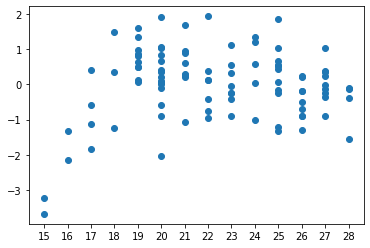

In [32]:
plt.scatter(x=Sun_yang_freestlye['Age'] , y =Sun_yang_freestlye['z_score'])
# plt.gca().invert_xaxis()

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [82]:
    model_sun_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                             LinearRegression())

    model_sun_lr.fit(Sun_yang_freestlye[['Age']],y =Sun_yang_freestlye[['z_score']])
    print(model_sun_lr.steps[1][1].coef_)

[[ 6.15934826e+01 -4.02903809e+00  1.16405874e-01 -1.25500999e-03]]


In [87]:
print(model_sun_lr.fit(Sun_yang_freestlye[['Age']],y =Sun_yang_freestlye[['z_score']]))

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linearregression', LinearRegression())])


In [84]:
import sympy

sympy.diff(model_sun_lr)

C:\Users\wndbs\anaconda3\lib\site-packages\sympy\core\sympify.py:449: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  SymPyDeprecationWarning(


ValueError: Unknown options: {'degree': 4, 'include_bias': False}

In [35]:
x_1 = Sun_yang_freestlye['Age']
y_1 = Sun_yang_freestlye['z_score']

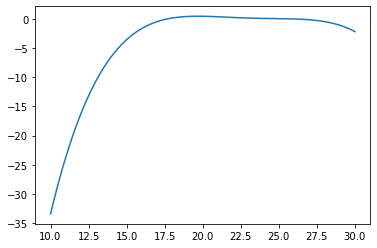

In [83]:
xx = np.linspace(10, 30, 100)
xxx = xx.reshape(-1, 1)
y_pred = model_sun_lr.predict(xxx)
plt.plot(xx, y_pred)


plt.show()

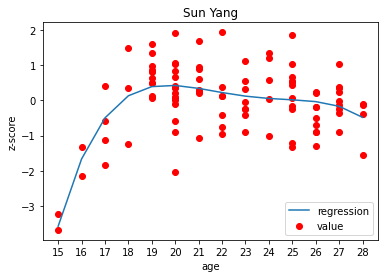

In [37]:
xx = np.linspace(15, 28, 100)
y_pred = model_lr.predict(Sun_yang_freestlye[['Age']])
plt.plot(Sun_yang_freestlye['Age'], y_pred, label = 'regression')

plt.scatter(x_1 , y_1, label = 'value',color = 'red')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Sun Yang')


plt.show()

# 페루선수

In [38]:
Peru['Event'].value_counts()

Men 200m Butterfly             20
Men 100m Butterfly             19
Men 50m Butterfly               6
Men 4x100m Medley Relay         6
Men 50m Backstroke              5
Men 100m Freestyle              4
Men 4x100m Freestyle Relay      4
Men 400m Freestyle              3
Men 200m Freestyle              3
Men 4x50m Medley Relay          2
Men 4x200m Freestyle Relay      2
Mixed 4x50m Freestyle Relay     1
Men 50 Butterfly                1
Men 1500m Freestyle             1
Men 200m Backstroke             1
Men 100m Backstroke             1
Name: Event, dtype: int64

In [39]:
#페루선수 200m 접영
Peru_200m = Peru[Peru['Event']== 'Men 200m Butterfly']

Peru_200m['min'] = Peru_200m['Time'].str.split(':').str[0]
Peru_200m['sec'] = Peru_200m['Time'].str.split(':').str[1]

Peru_200m['min'] = Peru_200m['min'].astype(float)
Peru_200m['sec'] = Peru_200m['sec'].astype(float)

Peru_200m['time'] = Peru_200m['min']*60 + Peru_200m['sec']

p_200_time = Peru_200m[['time']]

scaler.fit(p_200_time)
time_200_scaled = scaler.transform(p_200_time)

Peru_200m['time_scaled'] = time_200_scaled*-1

Peru_200m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,min,sec,time,time_scaled
122,Mauricio Fiol Villanueva,PER,1994.03.28,Male,178,16 (1),Men 200m Butterfly,Butterfly,01:56.8,-,-,21,17th Pan American Games 2015,CAN,14-07-2015,1.0,56.8,116.8,0.898879
124,Mauricio Fiol Villanueva,PER,1994.03.30,Male,178,1,Men 200m Butterfly,Butterfly,01:58.8,826,-,21,Pan Am Invite,USA,01-04-2015,1.0,58.8,118.8,0.083569
129,Mauricio Fiol Villanueva,PER,1994.03.35,Male,178,1,Men 200m Butterfly,Butterfly,01:58.8,826,-,20,National Interclub Championships,PER,17-12-2014,1.0,58.8,118.8,0.083569


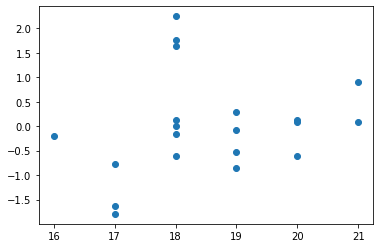

In [40]:
plt.scatter(x=Peru_200m['Age'] , y =Peru_200m['time_scaled'])
plt.gca().invert_xaxis()

In [41]:
#페루선수 100m 접영
Peru_100m = Peru[Peru['Event']== 'Men 100m Butterfly']

Peru_100m['time'] = Peru_100m['Time'].astype(float)

p_100_time = Peru_100m[['time']]

scaler.fit(p_100_time)
time_100_scaled = scaler.transform(p_100_time)

Peru_100m['time_scaled'] = time_100_scaled*-1

Peru_100m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,time,time_scaled
121,Mauricio Fiol Villanueva,PER,1994.03.27,Male,178,16 (2),Men 100m Butterfly,Butterfly,52.25,-,-,21,17th Pan American Games 2015,CAN,16-07-2015,52.25,1.474602
127,Mauricio Fiol Villanueva,PER,1994.03.33,Male,178,1,Men 100m Butterfly,Butterfly,53.03,829,-,20,Selectivo y Control de Marcas,PER,20-03-2015,53.03,0.562515
128,Mauricio Fiol Villanueva,PER,1994.03.34,Male,178,1,Men 100m Butterfly,Butterfly,54.44,766,-,20,National Interclub Championships,PER,18-12-2014,54.44,-1.086257


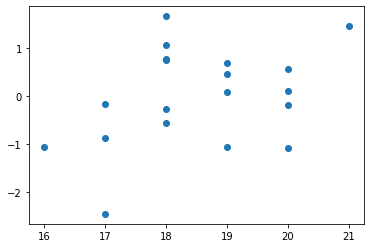

In [42]:
plt.scatter(x=Peru_100m['Age'] , y =Peru_100m['time_scaled'])
plt.gca().invert_xaxis()

In [43]:
#페루선수 50m 접영
Peru_50m = Peru[Peru['Event']== 'Men 50m Butterfly']

Peru_50m['time'] = Peru_50m['Time'].astype(float)

p_50_time = Peru_50m[['time']]

scaler.fit(p_50_time)
time_50_scaled = scaler.transform(p_50_time)

Peru_50m['time_scaled'] = time_50_scaled*-1

Peru_50m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,time,time_scaled
131,Mauricio Fiol Villanueva,PER,1994.03.37,Male,178,24,Men 50m Butterfly,Butterfly,24.03,746,H,20,FINA/MASTBANK Swimming World Cup 2014,JPN,28-10-2014,24.03,0.664197
135,Mauricio Fiol Villanueva,PER,1994.03.41,Male,178,15,Men 50m Butterfly,Butterfly,24.35,717,H,20,FINA/MASTBANK Swimming World Cup 2014,CHN,24-10-2014,24.35,0.391706
140,Mauricio Fiol Villanueva,PER,1994.03.46,Male,178,6,Men 50m Butterfly,Butterfly,24.57,760,-,20,42nd South American Swimming Championships 2014,ARG,02-10-2014,24.57,0.204368


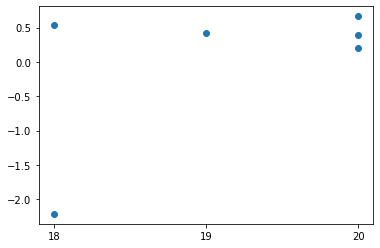

In [44]:
plt.scatter(x=Peru_50m['Age'] , y =Peru_50m['time_scaled'])
plt.gca().invert_xaxis()

In [45]:
Peru_total = pd.concat([Peru_50m, Peru_100m,Peru_200m])
Peru_total.head()

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,time,time_scaled,min,sec
131,Mauricio Fiol Villanueva,PER,1994.03.37,Male,178,24,Men 50m Butterfly,Butterfly,24.03,746,H,20,FINA/MASTBANK Swimming World Cup 2014,JPN,28-10-2014,24.03,0.664197,NaN,NaN
135,Mauricio Fiol Villanueva,PER,1994.03.41,Male,178,15,Men 50m Butterfly,Butterfly,24.35,717,H,20,FINA/MASTBANK Swimming World Cup 2014,CHN,24-10-2014,24.35,0.391706,NaN,NaN
140,Mauricio Fiol Villanueva,PER,1994.03.46,Male,178,6,Men 50m Butterfly,Butterfly,24.57,760,-,20,42nd South American Swimming Championships 2014,ARG,02-10-2014,24.57,0.204368,NaN,NaN
149,Mauricio Fiol Villanueva,PER,1994.03.55,Male,178,35,Men 50m Butterfly,Butterfly,24.32,784,H,19,15th FINA World Championships 2013,ESP,28-07-2013,24.32,0.417252,NaN,NaN
168,Mauricio Fiol Villanueva,PER,1994.03.74,Male,178,26,Men 50m Butterfly,Butterfly,27.41,503,H,18,FINA/Arena Swimming World Cup 2012,GER,20-10-2012,27.41,-2.213989,NaN,NaN


In [46]:
Peru_total = Peru_total.sort_values(by = 'Age' , ascending = True)
Peru_total.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Event(cat),Time,Points,Tag,Age,Competition,Comp Country,Date,time,time_scaled,min,sec
197,Mauricio Fiol Villanueva,PER,1994.03.104,Male,178,28,Men 200m Butterfly,Butterfly,01:59.5,762,H,16,10th FINA World Swimming Championships (25m) 2010,UAE,19-12-2010,119.50,-0.201789,1.0,59.5
198,Mauricio Fiol Villanueva,PER,1994.03.105,Male,178,51,Men 100m Butterfly,Butterfly,54.42,706,H,16,10th FINA World Swimming Championships (25m) 2010,UAE,15-12-2010,54.42,-1.062870,NaN,NaN
190,Mauricio Fiol Villanueva,PER,1994.03.97,Male,178,11,Men 200m Butterfly,Butterfly,02:03.4,738,-,17,16th Pan American Games 2011,MEX,17-10-2011,123.40,-1.791644,2.0,3.4


In [47]:
peru_lr = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                         LinearRegression())

peru_lr.fit(Peru_total[['Age']],y =Peru_total[['time_scaled']])
print(peru_lr.steps[1][1].coef_)

[[ 5.71145787e+01 -3.00025956e+00  5.25552150e-02]]


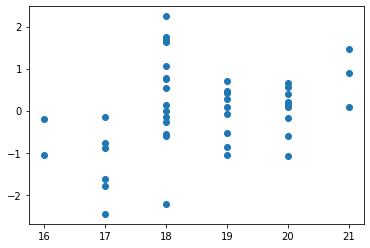

In [48]:
plt.scatter(Peru_total['Age'], Peru_total['time_scaled'])

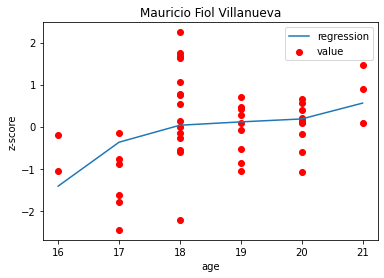

In [49]:
xx = np.linspace(10, 25, 100)
y_peru = peru_lr.predict(Peru_total[['Age']])
plt.plot(Peru_total['Age'], y_peru, label = 'regression')

plt.scatter(Peru_total['Age'], Peru_total['time_scaled'], color ='red',label = 'value')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Mauricio Fiol Villanueva')


plt.show()

# 여자선수

In [50]:
w = pd.read_csv('new_swim_data.csv')

In [51]:
w.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Time,Points,Tag,Age,Competition,Comp Country,Date
0,Rebeca Gusmao,BRA,1984.08.24,Female,178,8 (3),Women 50m Freestyle,25.07,-,-,22,24th Summer Universiade 2007,THA,12-08-2007
1,Rebeca Gusmao,BRA,1984.08.24,Female,178,7,Women 4x100m Medley Relay,04:09.3,-,-,22,15th Pan American Games 2007,BRA,22-07-2007
2,Rebeca Gusmao,BRA,1984.08.24,Female,178,8,Women 4x100m Freestyle Relay,03:43.0,-,-,22,15th Pan American Games 2007,BRA,19-07-2007


In [52]:
w['Event'].value_counts()

Women 50m Freestyle             18
Women 100m Freestyle            16
Women 4x100m Freestyle Relay     9
Women 50m Breaststroke           4
Women 100m Medley                2
Women 4x100m Medley Relay        1
Name: Event, dtype: int64

In [53]:
#여자선수 50m 자유형
w_50m = w[w['Event']== 'Women 50m Freestyle']

w_50m['time'] = w_50m['Time'].astype(float)

w_50_time = w_50m[['time']]

scaler.fit(w_50_time)
time_50_scaled = scaler.transform(w_50_time)

w_50m['time_scaled'] = time_50_scaled*-1

w_50m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Time,Points,Tag,Age,Competition,Comp Country,Date,time,time_scaled
0,Rebeca Gusmao,BRA,1984.08.24,Female,178,8 (3),Women 50m Freestyle,25.07,-,-,22,24th Summer Universiade 2007,THA,12-08-2007,25.07,0.704258
3,Rebeca Gusmao,BRA,1984.08.24,Female,178,8 (1),Women 50m Freestyle,25.05,-,-,22,15th Pan American Games 2007,BRA,18-07-2007,25.05,0.727843
4,Rebeca Gusmao,BRA,1984.08.24,Female,178,5,Women 50m Freestyle,25.64,-,-,21,10th Pan Pacific Championships 2006,CAN,20-08-2006,25.64,0.032101


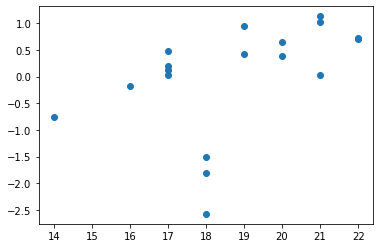

In [54]:
plt.scatter(x=w_50m['Age'] , y =w_50m['time_scaled'])

In [55]:
#여자선수 100m 자유형
w_100m = w[w['Event']== 'Women 100m Freestyle']

w_100m['time'] = w_100m['Time'].astype(float)

w_100_time = w_100m[['time']]

scaler.fit(w_100_time)
time_100_scaled = scaler.transform(w_100_time)

w_100m['time_scaled'] = time_100_scaled*-1

w_100m.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Time,Points,Tag,Age,Competition,Comp Country,Date,time,time_scaled
6,Rebeca Gusmao,BRA,1984.08.24,Female,178,8,Women 100m Freestyle,54.53,-,-,21,8th FINA World Swimming Championships (25m) 2006,CHN,07-04-2006,54.53,1.330170
7,Rebeca Gusmao,BRA,1984.08.24,Female,178,1,Women 100m Freestyle,54.08,-,-,21,FINA Swimming World Cup 2005-2006,BRA,12-02-2006,54.08,1.654491
10,Rebeca Gusmao,BRA,1984.08.24,Female,178,3,Women 100m Freestyle,54.78,-,-,20,FINA Swimming World Cup 2004-2005,BRA,20-02-2005,54.78,1.149991


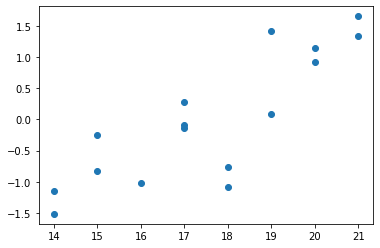

In [56]:
plt.scatter(x=w_100m['Age'] , y =w_100m['time_scaled'])

In [57]:
w_total = pd.concat([w_50m, w_100m,])
w_total.head()

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Time,Points,Tag,Age,Competition,Comp Country,Date,time,time_scaled
0,Rebeca Gusmao,BRA,1984.08.24,Female,178,8 (3),Women 50m Freestyle,25.07,-,-,22,24th Summer Universiade 2007,THA,12-08-2007,25.07,0.704258
3,Rebeca Gusmao,BRA,1984.08.24,Female,178,8 (1),Women 50m Freestyle,25.05,-,-,22,15th Pan American Games 2007,BRA,18-07-2007,25.05,0.727843
4,Rebeca Gusmao,BRA,1984.08.24,Female,178,5,Women 50m Freestyle,25.64,-,-,21,10th Pan Pacific Championships 2006,CAN,20-08-2006,25.64,0.032101
5,Rebeca Gusmao,BRA,1984.08.24,Female,178,5,Women 50m Freestyle,24.8,-,-,21,8th FINA World Swimming Championships (25m) 2006,CHN,09-04-2006,24.80,1.022648
9,Rebeca Gusmao,BRA,1984.08.24,Female,178,1,Women 50m Freestyle,24.71,-,-,21,FINA Swimming World Cup 2005-2006,BRA,11-02-2006,24.71,1.128778


In [58]:
w_total = w_total.sort_values(by = 'Age' , ascending = True)
w_total.head(3)

,Name,Country,Date of Birth,Gender,Height,Rank,Event,Time,Points,Tag,Age,Competition,Comp Country,Date,time,time_scaled
48,Rebeca Gusmao,BRA,1984.08.24,Female,178,8,Women 100m Freestyle,57.98,-,-,14,FINA Swimming World Cup 1998-1999,BRA,22-11-1998,57.98,-1.156297
49,Rebeca Gusmao,BRA,1984.08.24,Female,178,7,Women 50m Freestyle,26.31,-,-,14,FINA Swimming World Cup 1998-1999,BRA,21-11-1998,26.31,-0.757978
47,Rebeca Gusmao,BRA,1984.08.24,Female,178,9,Women 100m Freestyle,58.48,-,-,14,13th Pan American Games 1999,CAN,02-08-1999,58.48,-1.516655


In [59]:
w_lr = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                         LinearRegression())

w_lr.fit(w_total[['Age']],y =w_total[['time_scaled']])
print(w_lr.steps[1][1].coef_)

[[-3.58280055e+00  2.01598912e-01 -3.45754610e-03]]


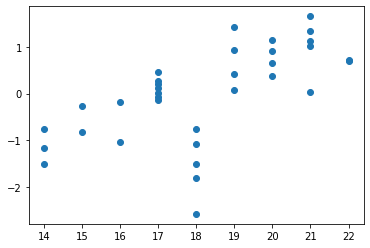

In [60]:
plt.scatter(w_total['Age'], w_total['time_scaled'])

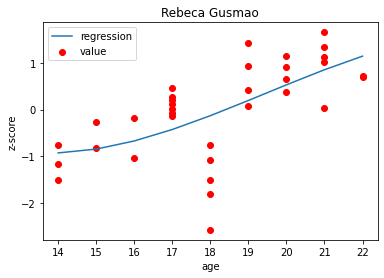

In [61]:
xx = np.linspace(10, 25, 100)
y_w = w_lr.predict(w_total[['Age']])
plt.plot(w_total['Age'], y_w, label = 'regression')

plt.scatter(w_total['Age'], w_total['time_scaled'], color ='red',label = 'value')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Rebeca Gusmao')


plt.show()

# 펠프스

In [62]:
phelps = pd.read_csv('michael_phelps.csv')
phelps.head(3)

,Event,Time,Age
0,Men 4x100m Medley Relay,03:27.9,31
1,Men 4x100m Medley Relay,2:41.21,31
2,Men 100m Butterfly,51.14,31


In [63]:
phelps['Event'].value_counts()

Men 100m Butterfly            44
Men 200m Medley               42
Men 200m Butterfly            40
Men 200m Freestyle            28
Men 4x100m Medley Relay       24
Men 100m Freestyle            23
Men 400m Medley               23
Men 4x100m Freestyle Relay    22
Men 4x200m Freestyle Relay    20
Men 200m Backstroke           10
Men 100m Backstroke            8
Men 100m Medley                6
Men 50m Butterfly              4
Men 400m Freestyle             1
Men 50 Butterfly               1
Men 200m Breaststroke          1
Men 100m Breaststroke          1
Men 1500m Freestyle            1
Name: Event, dtype: int64

In [64]:
#100m 접영
phelps_b_100m = phelps[phelps['Event']== 'Men 100m Butterfly']

phelps_b_100m['time'] = phelps_b_100m['Time'].astype(float)

phelps_b_100m_time = phelps_b_100m[['time']]

scaler.fit(phelps_b_100m_time)
time_phelps_b_100m_scaled = scaler.transform(phelps_b_100m_time)

phelps_b_100m['time_scaled'] = time_phelps_b_100m_scaled*-1

phelps_b_100m.head(3)

,Event,Time,Age,time,time_scaled
2,Men 100m Butterfly,51.14,31,51.14,0.605365
7,Men 100m Butterfly,51.00,31,51.00,0.772812
11,Men 100m Butterfly,51.65,30,51.65,-0.004621


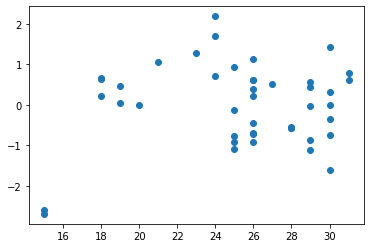

In [65]:
plt.scatter(x=phelps_b_100m['Age'] , y =phelps_b_100m['time_scaled'])

In [66]:
#200m 접영
phelps_b_200m = phelps[phelps['Event']== 'Men 200m Butterfly']

phelps_b_200m['min'] = phelps_b_200m['Time'].str.split(':').str[0]
phelps_b_200m['sec'] = phelps_b_200m['Time'].str.split(':').str[1]

phelps_b_200m['min'] = phelps_b_200m['min'].astype(float)
phelps_b_200m['sec'] = phelps_b_200m['sec'].astype(float)

phelps_b_200m['time'] = phelps_b_200m['min']*60 + phelps_b_200m['sec']

phelps_b_200m_time = phelps_b_200m[['time']]

scaler.fit(phelps_b_200m_time)
phelps_b_200m_scaled = scaler.transform(phelps_b_200m_time)

phelps_b_200m['time_scaled'] = phelps_b_200m_scaled*-1

phelps_b_200m.head(3)

,Event,Time,Age,min,sec,time,time_scaled
5,Men 200m Butterfly,1:53.36,31,1.0,53.36,113.36,0.745272
9,Men 200m Butterfly,1:54.84,30,1.0,54.84,114.84,0.014565
14,Men 200m Butterfly,1:58.14,30,1.0,58.14,118.14,-1.614715


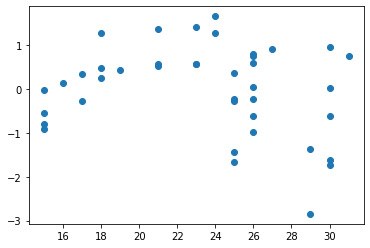

In [67]:
plt.scatter(x=phelps_b_200m['Age'] , y =phelps_b_200m['time_scaled'])

In [68]:
#200m 자유형
phelps_f_200m = phelps[phelps['Event']== 'Men 200m Freestyle']

phelps_f_200m['min'] = phelps_f_200m['Time'].str.split(':').str[0]
phelps_f_200m['sec'] = phelps_f_200m['Time'].str.split(':').str[1]

phelps_f_200m['min'] = phelps_f_200m['min'].astype(float)
phelps_f_200m['sec'] = phelps_f_200m['sec'].astype(float)

phelps_f_200m['time'] = phelps_f_200m['min']*60 + phelps_f_200m['sec']

phelps_f_200m_time = phelps_f_200m[['time']]

scaler.fit(phelps_f_200m_time)
phelps_f_200m_scaled = scaler.transform(phelps_f_200m_time)

phelps_f_200m['time_scaled'] = phelps_f_200m_scaled*-1

phelps_f_200m.head(3)

,Event,Time,Age,min,sec,time,time_scaled
10,Men 200m Freestyle,1:48.73,30,1.0,48.73,108.73,-0.801917
15,Men 200m Freestyle,1:48.21,30,1.0,48.21,108.21,-0.594603
20,Men 200m Freestyle,1:48.87,30,1.0,48.87,108.87,-0.857733


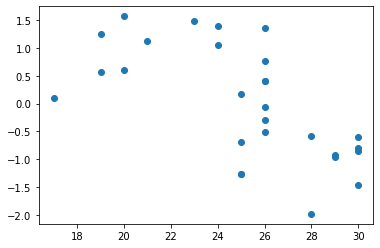

In [69]:
plt.scatter(x=phelps_f_200m['Age'] , y =phelps_f_200m['time_scaled'])

In [70]:
#100m 자유형
phelps_f_100m = phelps[phelps['Event']== 'Men 100m Freestyle']

phelps_f_100m['time'] = phelps_f_100m['Time'].astype(float)

phelps_f_100m_time = phelps_f_100m[['time']]

scaler.fit(phelps_f_100m_time)
time_phelps_f_100m_scaled = scaler.transform(phelps_f_100m_time)

phelps_f_100m['time_scaled'] = time_phelps_f_100m_scaled*-1

phelps_f_100m.head(3)

,Event,Time,Age,time,time_scaled
12,Men 100m Freestyle,50.84,30,50.84,-2.142659
16,Men 100m Freestyle,49.57,30,49.57,-0.311557
21,Men 100m Freestyle,49.77,30,49.77,-0.599919


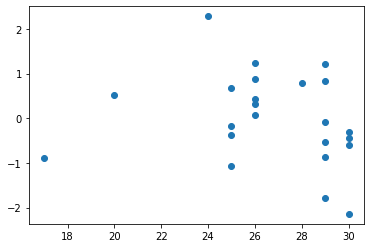

In [71]:
plt.scatter(x=phelps_f_100m['Age'] , y =phelps_f_100m['time_scaled'])

In [72]:
# 200m 혼영
phelps_m_200m = phelps[phelps['Event']== 'Men 200m Medley']

phelps_m_200m['min'] = phelps_m_200m['Time'].str.split(':').str[0]
phelps_m_200m['sec'] = phelps_m_200m['Time'].str.split(':').str[1]

phelps_m_200m['min'] = phelps_m_200m['min'].astype(float)
phelps_m_200m['sec'] = phelps_m_200m['sec'].astype(float)

phelps_m_200m['time'] = phelps_m_200m['min']*60 + phelps_m_200m['sec']

phelps_m_200m_time = phelps_m_200m[['time']]

scaler.fit(phelps_m_200m_time)
phelps_m_200m_scaled = scaler.transform(phelps_m_200m_time)

phelps_m_200m['time_scaled'] = phelps_m_200m_scaled*-1

phelps_m_200m.head(3)




,Event,Time,Age,min,sec,time,time_scaled
3,Men 200m Medley,1:54.66,31,1.0,54.66,114.66,1.006540
8,Men 200m Medley,1:55.91,31,1.0,55.91,115.91,0.445451
13,Men 200m Medley,1:57.90,30,1.0,57.90,117.90,-0.447802


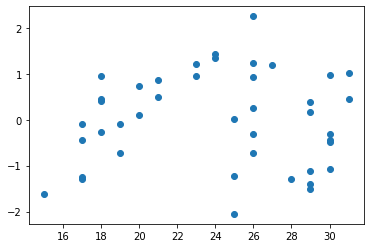

In [73]:
plt.scatter(x=phelps_m_200m['Age'] , y =phelps_m_200m['time_scaled'])

In [74]:
# 400m 혼영
phelps_m_400m = phelps[phelps['Event']== 'Men 400m Medley']

phelps_m_400m['min'] = phelps_m_400m['Time'].str.split(':').str[0]
phelps_m_400m['sec'] = phelps_m_400m['Time'].str.split(':').str[1]

phelps_m_400m['min'] = phelps_m_400m['min'].astype(float)
phelps_m_400m['sec'] = phelps_m_400m['sec'].astype(float)

phelps_m_400m['time'] = phelps_m_400m['min']*60 + phelps_m_400m['sec']

phelps_m_400m_time = phelps_m_400m[['time']]

scaler.fit(phelps_m_400m_time)
phelps_m_400m_scaled = scaler.transform(phelps_m_400m_time)

phelps_m_400m['time_scaled'] = phelps_m_400m_scaled*-1

phelps_m_400m.head(3)

,Event,Time,Age,min,sec,time,time_scaled
76,Men 400m Medley,4:09.28,27,4.0,9.28,249.28,0.205389
77,Men 400m Medley,4:07.89,26,4.0,7.89,247.89,0.451595
82,Men 400m Medley,4:15.88,26,4.0,15.88,255.88,-0.963643


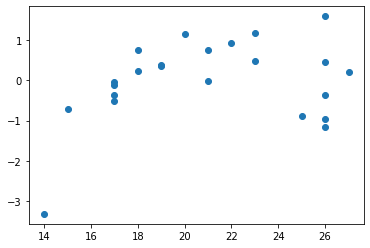

In [75]:
plt.scatter(x=phelps_m_400m['Age'] , y =phelps_m_400m['time_scaled'])

In [76]:
phelps_m_200m = phelps_m_200m.drop(['min','sec'], axis =1)
phelps_m_400m = phelps_m_400m.drop(['min','sec'], axis =1)
phelps_b_200m = phelps_b_200m.drop(['min','sec'], axis =1)
phelps_f_200m = phelps_f_200m.drop(['min','sec'], axis =1)

In [77]:
phelps_total = pd.concat([phelps_m_200m ,phelps_m_400m,phelps_b_200m,phelps_f_200m,phelps_f_100m,phelps_b_100m ])
phelps_total.head()

,Event,Time,Age,time,time_scaled
3,Men 200m Medley,1:54.66,31,114.66,1.006540
8,Men 200m Medley,1:55.91,31,115.91,0.445451
13,Men 200m Medley,1:57.90,30,117.90,-0.447802
19,Men 200m Medley,1:58.00,30,118.00,-0.492689
25,Men 200m Medley,1:57.61,30,117.61,-0.317630


In [78]:
phelps_total = phelps_total.sort_values(by = 'Age' , ascending = True)
phelps_total.head(3)

,Event,Time,Age,time,time_scaled
298,Men 400m Medley,4:29.15,14,269.15,-3.314107
293,Men 200m Medley,2:00.50,15,120.50,-1.614866
294,Men 400m Medley,4:14.40,15,254.40,-0.701496


In [79]:
phelps_lr = make_pipeline(PolynomialFeatures(degree=4, include_bias=False),
                         LinearRegression())

phelps_lr.fit(phelps_total[['Age']],y =phelps_total[['time_scaled']])
print(phelps_lr.steps[1][1].coef_)

[[-1.01058535e+01  8.92606031e-01 -3.16159579e-02  3.91211767e-04]]


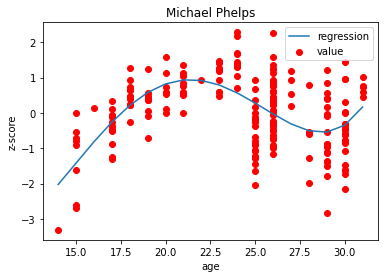

In [80]:
xx = np.linspace(10, 35, 100)
y_phelps = phelps_lr.predict(phelps_total[['Age']])
plt.plot(phelps_total['Age'], y_phelps, label = 'regression')

plt.scatter(phelps_total['Age'], phelps_total['time_scaled'], color ='red',label = 'value')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.title('Michael Phelps')


plt.show()

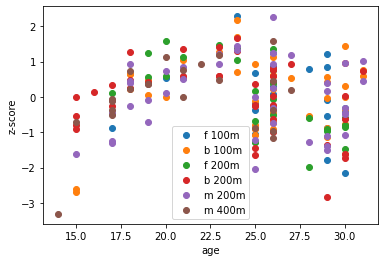

In [81]:
plt.scatter(x=phelps_f_100m['Age'] , y =phelps_f_100m['time_scaled'], label = 'f 100m')
plt.scatter(x=phelps_b_100m['Age'] , y =phelps_b_100m['time_scaled'], label = 'b 100m')
plt.scatter(x=phelps_f_200m['Age'] , y =phelps_f_200m['time_scaled'], label = 'f 200m')
plt.scatter(x=phelps_b_200m['Age'] , y =phelps_b_200m['time_scaled'], label = 'b 200m')
plt.scatter(x=phelps_m_200m['Age'] , y =phelps_m_200m['time_scaled'], label = 'm 200m')
plt.scatter(x=phelps_m_400m['Age'] , y =phelps_m_400m['time_scaled'], label = 'm 400m')

plt.xlabel('age')
plt.ylabel('z-score')
plt.legend()
plt.show()